# Exploratory Data Analysis (EDA) using Python — E-sports Earnings 1998 to 2021

**Exploratory Data Analysis (EDA)** helps in the understanding of data. It is an important "Analyst and Scientist" routine, which gives you the vision of all your data. It´s special because it will allow you to define the data you should mantain in the dataset and the ones you should discard.

Pandas Library, that is essential tool for any analysis will be used for the EDA with the following steps below:

**Steps:**
1. Import Libraries
2. Know your dataset
3. Data Cleaning
4. Data Visualization
5. Ask Questions to your dataset
6. Brainstorming
7. Making imformed decisions

**Dataset:** [Kaggle E.sports datasets](https://www.kaggle.com/datasets/rankirsh/esports-earnings/download?datasetVersionNumber=17)

## Importing Library’s

For EDA we will use the following python libraries:
- pandas: for Data manipulation
- seaborn: for Data visuzlization
- matplotlib.pyplot: for Data visuzlization

In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

## Study your dataset

At first, we’ll load our dataset. This will be based on the extension of the file you are loading. The most common file extensions are .xlsx (excel) and .csv (comma separated values). In our case, the file downloaded from kaggle it’s a csv.

We will load the file into a "df" variable and use "head.()" pandas function to view the first 5 rows by default.
- df.head(10) - Returns the first 10 rows
- df.head(20) - Returns the first 20 rows

The same happens for “.tail( )” pandas function. Which will return the last 5 rows of the dataset.

In [18]:
df = pd.read_csv('GeneralEsportData.csv', sep=',', encoding='cp1252')
df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17


To know the size of your dataset, we have a great function named “.shape”, without the parentheses. We can see the dimension of the dataset, the first number is the total of rows and the second is the total of columns. See code below:

In [19]:
df.shape

(558, 7)

To show more details like the columns details. We will use “.info( )”, which returns the information about the columns.
See code below:

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              558 non-null    object 
 1   ReleaseDate       558 non-null    int64  
 2   Genre             558 non-null    object 
 3   TotalEarnings     558 non-null    float64
 4   OnlineEarnings    558 non-null    float64
 5   TotalPlayers      558 non-null    int64  
 6   TotalTournaments  558 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 30.6+ KB


What we can conclude by looking at the code outpout is that we have:
- RangeIndex: 558 rows, from 0 to 557
- Data columns: 7 columns
- #: is the Index
- Column: Name of the columns
- Non-Null Count: It’s the count of not null values. Look that “TotalTournaments” column has 98 Non-Null values, means that have 460 Null values. This can be handled in the Data Cleaning step.
- Dtype: It’s the Data Type of the column. We only have int(integer), float(floating point numbers) and object(string).

A good practice is to see what are the unique values in each column, sometimes you will have the same information writen in different ways. We’ll use the function named “.unique( )” to do so.

In [21]:
df["Genre"].unique()

array(['Strategy', 'First-Person Shooter',
       'Multiplayer Online Battle Arena', 'Role-Playing Game',
       'Fighting Game', 'Racing', 'Sports', 'Collectible Card Game',
       'Puzzle Game', 'Battle Royale', 'Third-Person Shooter'],
      dtype=object)

The code above returns a list of unique genres that are in the dataset. The method **_"describe()"_** gives a descriptive statistic vision, which shows a few important measures. It’s good to remember that this method can't be used with categorical variables, only numericals.

In [22]:
df.describe()


,ReleaseDate,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,558.000000,5.580000e+02,5.580000e+02,558.000000,558.000000
mean,2011.500000,2.064622e+06,1.515452e+06,200.926523,86.177419
std,7.208799,1.484289e+07,1.233895e+07,861.633622,437.466932
min,1981.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2007.000000,1.027928e+03,0.000000e+00,5.000000,1.000000
50%,2013.000000,3.540318e+04,1.234000e+04,21.000000,5.000000
75%,2017.000000,2.205000e+05,1.394442e+05,103.000000,28.000000
max,2021.000000,2.791530e+08,2.555828e+08,14708.000000,6283.000000


As you can see, we have the count of lines, mean, standard deviation, minimum value, medium value (50%), maximum value and the quantiles (25% and 75%).
- 14708 as the largest number of players in a single title
- 6283 as the largest number of tournaments in a single title
- A mean more or less of 200 players and 86 tournaments per title

**Data Cleaning**

This is a very important part of a good and reliable EDA, it comes before data visualization and the other steps I mentioned at the beginning, we need to clean up all the bad data that we have inside the dataset so we don't transmit bad insights, visualizations and decisions to the business.

We’ll deal with **Bad Outliers, NaN Values (Null) and Duplicated Values.**

## Duplicated Values

In [24]:
df.duplicated().sum()

0

We can see that the dataset does not have duplicated values. We use “.sum( )” to add the number of duplicated values, which in our case equals 0.

## NaN Values(Null)

The “.info( )” returns the number of rows (RangeIndex: 558 entries) and the number of non-null values. When these two number are equal, means doesn’t have null values, we can check this very easily with the “.isnull( )” function.

In [25]:
df.isnull().sum()

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OnlineEarnings      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

The “.sum( )” function was used to sum the null values for us and it confirmed there isn’t null values in this dataset. However, if you are cleaning another dataset and some null values are present, how can they be cleaned?

To treat null values, need to consider each column separatedly, this is because each one may have a specific data type. Numerical data can be substitute for zeros or thier means. While categorical should be treated differently. Each case can be addressed using the “.fillna( )” function as illustrated bellow:

- For Categorical take a look at the "Genre" column.
- For Numerical, take a look at the "TotalEarnings" column.

### Categorical:

In [31]:
df_new = pd.read_csv('GeneralEsportData_copy.csv', sep=',', encoding='cp1252')
df_new.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,NaN,NaN,41800.00,139,120
3,Age of Empires IV,2021,NaN,NaN,217.00,248,79
4,Age of Empires Online,2011,NaN,NaN,775.00,25,17


In [32]:
df_new["Genre"].fillna("No Genre", inplace=True)
df_new.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,No Genre,NaN,41800.00,139,120
3,Age of Empires IV,2021,No Genre,NaN,217.00,248,79
4,Age of Empires Online,2011,No Genre,NaN,775.00,25,17


### Numerical:

In [35]:
mean = int(df_new["TotalEarnings"].mean())
df_new["TotalEarnings"].fillna(mean, inplace=True)
df_new.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,No Genre,2075331.00,41800.00,139,120
3,Age of Empires IV,2021,No Genre,2075331.00,217.00,248,79
4,Age of Empires Online,2011,No Genre,2075331.00,775.00,25,17


## Outliers

In this dataset we don’t have outliers, because it’s only informations about the games. However, we can use it just as an illustration o how to handle outliers.

First of all we need to identify the outliers. Outliers only exists when considering numbers, therefore, we’ll not focus on categorical labels but on numerical labels.

We have **TotalEarnings, OnlineEarnings, TotalPlayers and TotalTournaments.** We’ll use the **_hist()_** function for the outliers.

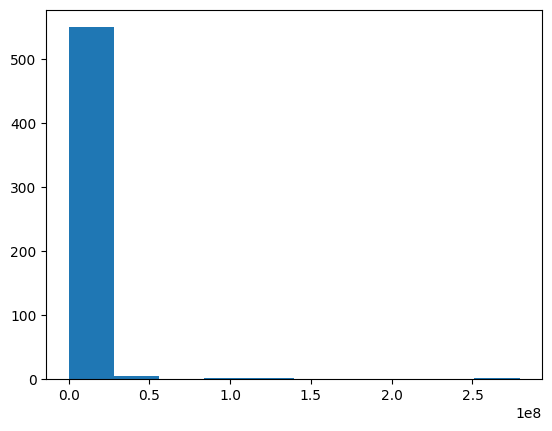

In [37]:
plt.hist(df["TotalEarnings"]);

We can see there’s one game that have more than 14.000 players, it’s far away of the mean. Other example it’s with “.boxplot( )”, a function from seaborn library.

<AxesSubplot:>

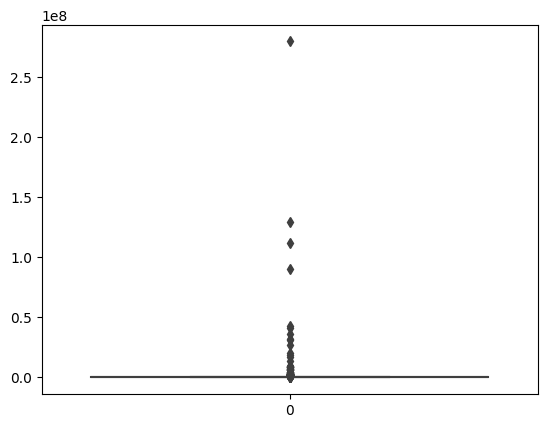

In [39]:
sn.boxplot(df["TotalEarnings"])

The boxplot it’s a good vision but if the data is too close for each other, turns into a bad way to visualize the data.

Now we’ll get the index of this outlier:

In [41]:
df.index[df["TotalPlayers"] >= 14000].tolist()

[92]

It returns to us the number 92, which is the number of the line where the outlier is, let’s check:


In [44]:
df.loc[92]

Game                Counter-Strike: Global Offensive
ReleaseDate                                     2012
Genre                           First-Person Shooter
TotalEarnings                           129352068.91
OnlineEarnings                           83502772.76
TotalPlayers                                   14708
TotalTournaments                                6081
Name: 92, dtype: object

In [45]:
df.loc[df["TotalPlayers"] >= 14000]

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
92,Counter-Strike: Global Offensive,2012,First-Person Shooter,1.293521e+08,83502772.76,14708,6081



The number of total players is way too far of the mean, so we can’t replace for the mean. A good practice when this happens is to replace for the median, so let’s do it.

Getting the median with “.median( )” function:

In [47]:
median_value = df["TotalPlayers"].median()
df["TotalPlayers"][92] = median_value

Let's check the outlier again and we see its gone

In [48]:
df.loc[92]

Game                Counter-Strike: Global Offensive
ReleaseDate                                     2012
Genre                           First-Person Shooter
TotalEarnings                           129352068.91
OnlineEarnings                           83502772.76
TotalPlayers                                      21
TotalTournaments                                6081
Name: 92, dtype: object

## Data Visualization

This is used to take a graphical view of the data. Here are some examples:

### “.corr( )” — We can see the correlation between variables.

<AxesSubplot:>

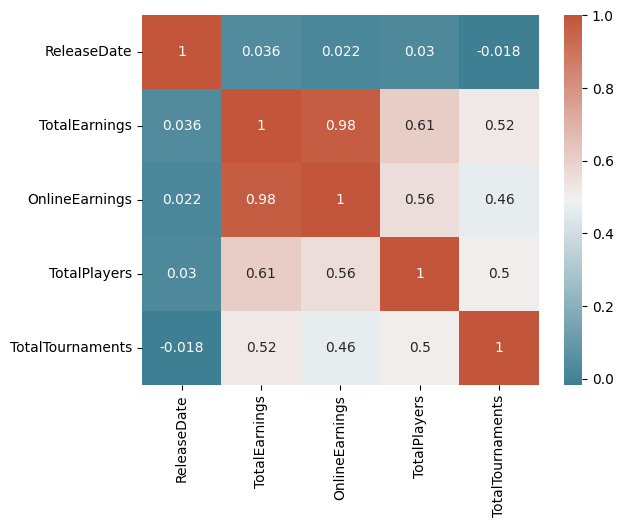

In [49]:
corr = df.corr()
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
          annot=True, cmap=sn.diverging_palette(220, 20, as_cmap=True)
          )

What we can conclude here is that as older the ReleaseDate as lower is TotalEarnings, OnlineEarnings, TotalPlayers and TotalTournamens. This means that in the past they didn’t have many players or championships, so the gains were very low or almost nil.

### “plt.subplots( )” — Relation Tournaments per Year

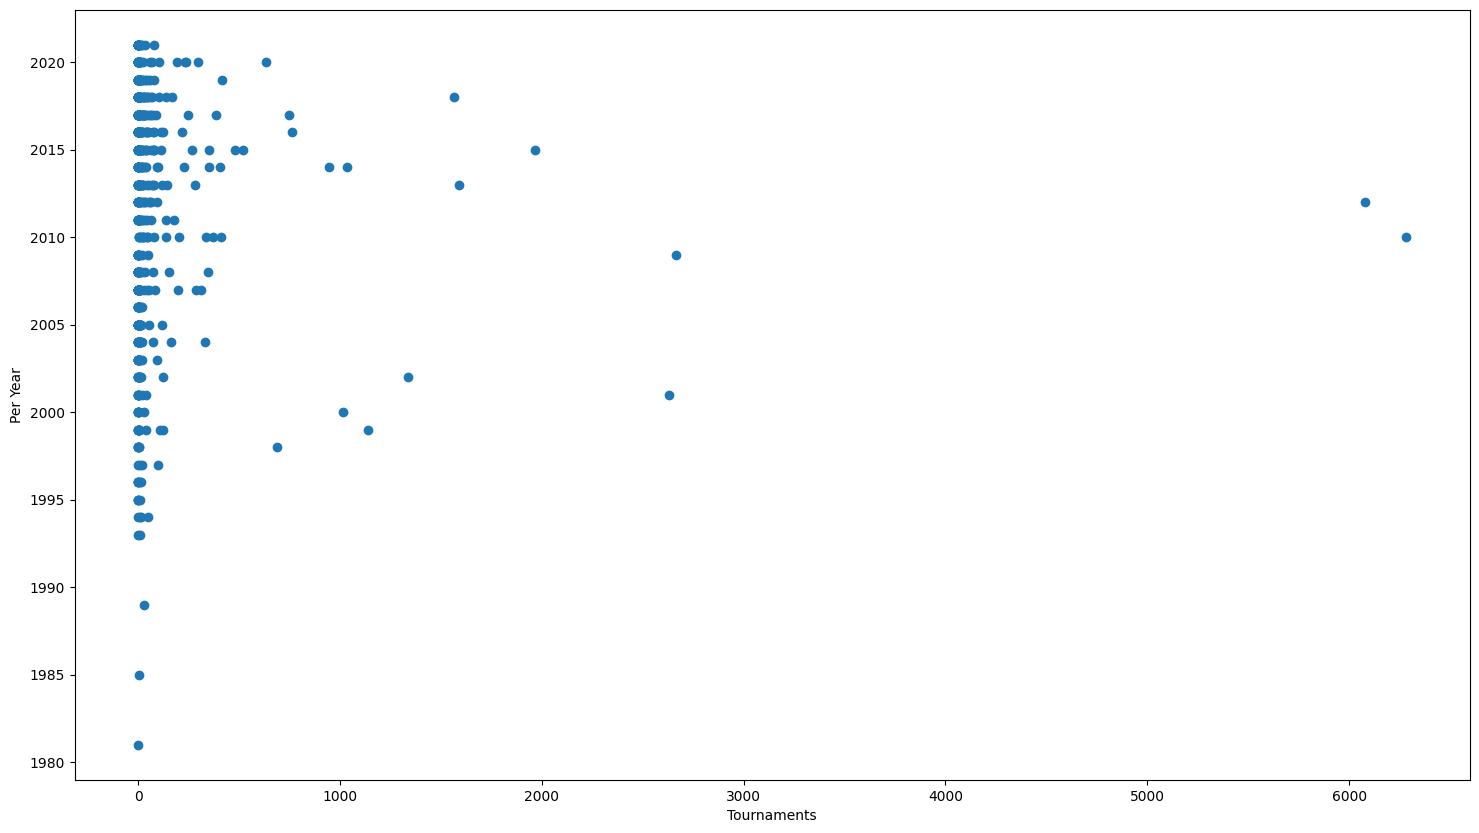

In [50]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18, 10))
ax.scatter(df["TotalTournaments"], df["ReleaseDate"])

# x-axis label
ax.set_xlabel("Tournaments")

# y-axis label
ax.set_ylabel("Per Year")

# Show plot
plt.show()

Here we have in the axis X (Total Tournaments) and in the axis Y (Years), the number of tournaments starts to grow 1993.

### “.plot( )” — The relation between columns in a general vision.

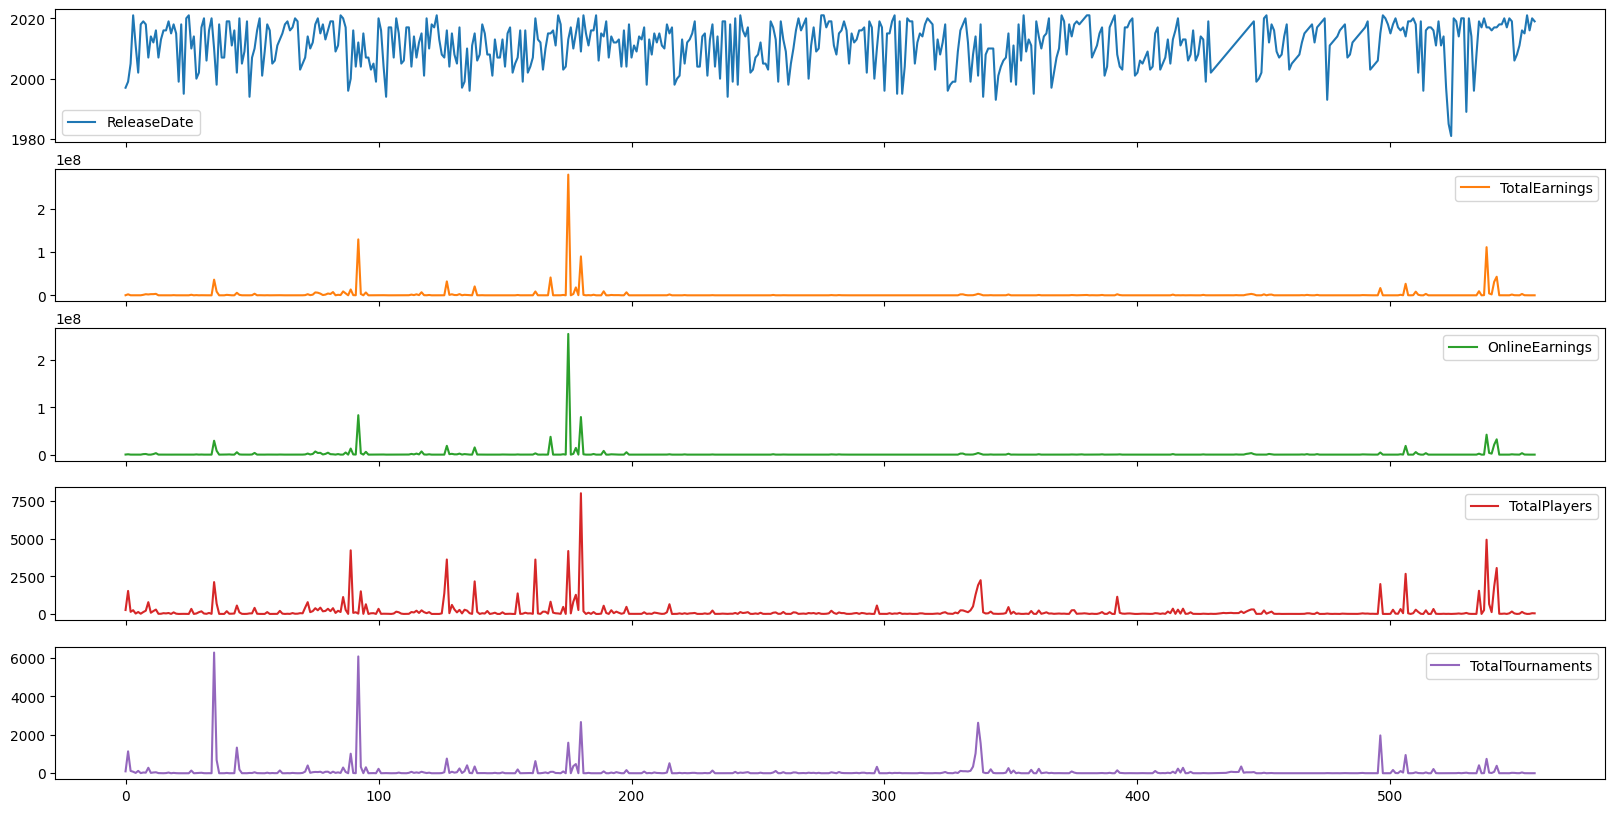

In [51]:
df.plot(subplots=True, figsize=(20, 10));

Several other types of visualizations weren’t covered which can be used depending on the dataset. These include bar graphs, area plots, violin plots, and even geospatial visuals.

## Conclusion

After all these steps of EDA, you may have a better idea of your data. The next step of brainstorming and decision making are based on personal goals. It should be done carefully because it is as important as the other steps.